[View in Colaboratory](https://colab.research.google.com/github/kintarou/django-starter/blob/master/Bayesian_Ridge_Regression.ipynb)

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.linear_model import BayesianRidge, LinearRegression

In [0]:
np.random.seed(1)
n_samples = 100
n_features = 100
X=np.random.randn(n_samples,n_features)
lambda_=4.
w=np.ones(n_features)
relevant_features=np.random.randint(0,n_features,10)

In [0]:
for i in relevant_features:
  w[i]=stats.norm.rvs(loc=0,scale=1./np.sqrt(lambda_))
  alpha_=50.
  noise=stats.norm.rvs(loc=0,scale=1./np.sqrt(alpha_),size=n_samples)
  y=np.dot(X,w)+noise

In [11]:
clf=BayesianRidge(compute_score=True)
clf.fit(X,y)
ols=LinearRegression()
ols.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

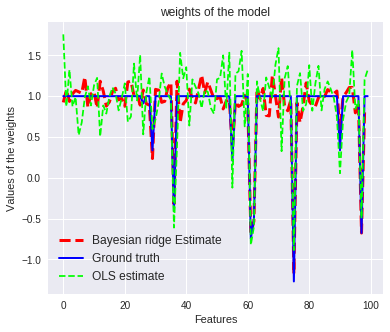

In [23]:
plt.figure(figsize=(6,5))
plt.title("weights of the model")
plt.plot(clf.coef_,color='red',linewidth=3,label="Bayesian ridge Estimate",linestyle='dashed')
plt.plot(w, color='blue',linewidth=2,label="Ground truth")
plt.plot(ols.coef_,color='lime',linestyle='--',label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best",prop=dict(size=12))

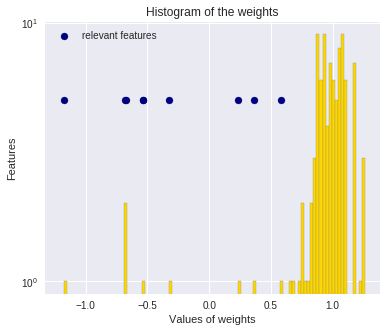

In [29]:
plt.figure(figsize=(6,5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_,bins=n_features,color='gold',log=True,edgecolor='gray')
plt.scatter(clf.coef_[relevant_features],5*np.ones(len(relevant_features)),color='navy',label="relevant features")
plt.xlabel("Values of weights")
plt.ylabel("Features")
plt.legend(loc="best")

Text(0,0.5,'Score')

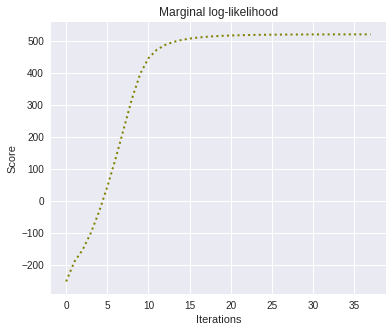

In [32]:
plt.figure(figsize=(6,5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_,color='olive',linewidth=2,linestyle="dotted")
plt.xlabel("Iterations")
plt.ylabel("Score")

In [0]:
def f(x,noise_amount):
  y=np.sqrt(x)+np.sin(x)
  noise=np.random.normal(0,1,len(x))
  return y+noise_amount*noise

In [35]:
degree=10
X=np.linspace(0,10,100)
y=f(X,noise_amount=0.1)
clf_poly=BayesianRidge()
clf_poly.fit(np.vander(X,degree),y)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [0]:
X_plot=np.linspace(0,11,25)
y_plot=f(X_plot,noise_amount=0)
y_mean, y_std=clf_poly.predict(np.vander(X_plot, degree),return_std=True)

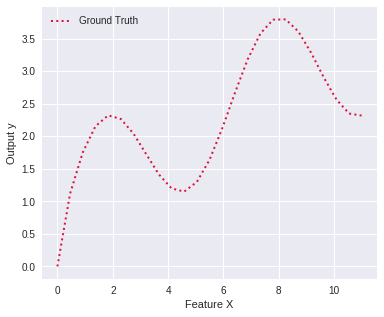

In [42]:
plt.figure(figsize=(6,5))
plt.errorbar(X_plot,y_plot,color='crimson',linewidth=2,linestyle='dotted',label="Ground Truth")
plt.xlabel("Feature X")
plt.ylabel("Output y")
plt.legend(loc="best")
plt.show()